In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl
import missingno as msno
import stat
from scipy.stats.stats import pearsonr
import scipy.stats as stats

from sklearn.metrics import mean_squared_error, r2_score


# import train test split for splitting the data in train and test
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression



In [2]:
data = "https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/Original_2000_2014_Fuel_Consumption_Ratings.csv"

missing_data = ['na','N/A','','None','NAN','non',"NONE"]

In [3]:
df = pd.read_csv(data)

In [4]:
# See if any data is missing
df.isna().any().all()

False

In [5]:
# look at the shape
df.shape

(14343, 13)

In [6]:
#renaming the columns 
df.rename(columns = {
    'FUEL_CONSUMPTION_CITY(L/100km)' : 'FUEL_CONS_CITY',
    'ENGINE_SIZE(L)' :'ENGINE SIZE',
    'HWY_(L/100km)':'HWY_L100',
    'COMB_(L/100km)': 'COMB_L100',
    'COMB_(mpg)': 'COMB_mpg',
    'CO2_EMISSIONS(g/km)' : 'CO2_EMISSIONS'},
    inplace = True)

In [7]:
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY,HWY_L100,COMB_L100,COMB_mpg,CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [8]:
df[df['CYLINDERS'] == 16]

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY,HWY_L100,COMB_L100,COMB_mpg,CO2_EMISSIONS
9120,2010,BUGATTI,VEYRON,TWO-SEATER,8.0,16,AS7,Z,27.5,15.5,22.1,13,508
10149,2011,BUGATTI,VEYRON,TWO-SEATER,8.0,16,AS7,Z,26.1,15.5,21.3,13,490
11220,2012,BUGATTI,VEYRON,TWO-SEATER,8.0,16,AS7,Z,26.1,15.5,21.3,13,490


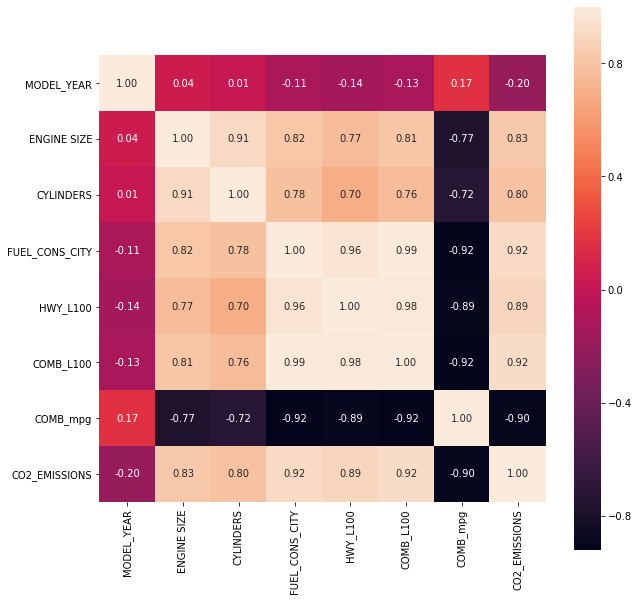

In [9]:
# Correlation matrix for the variable
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(corrmat,vmax=1, square=True
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [10]:
# The thing we are trying to look at is the the CO2 emission, and what is it affected by.


In [11]:
# Simple linear regression first (C02 and Engine size) 



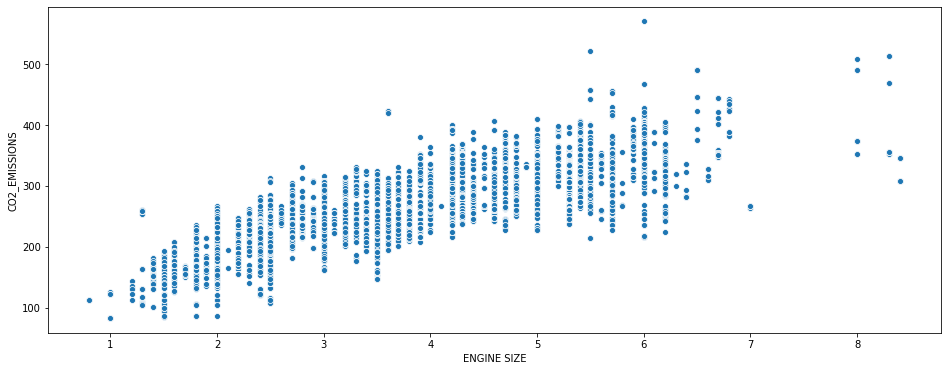

In [12]:
# scatter plot the relationship between the two
plt.figure(figsize=(16,6))
co2_enginesize = sns.scatterplot(df['ENGINE SIZE'], df.CO2_EMISSIONS)
# It looks like there is a positive correlation between the engine size and co2 emission. Meaning as the 
#engine size increase so does the CO2 Emission


In [13]:
# Simple linear regression model to predict the CO2 emission for engine size . What do we need.
# predicted Co2 emission = slope*x + y-intercept


In [14]:
# Manually calculating the slope. Slope = Person's coefficent(Std of Y / std of X)

# Pearson's R (or Correlation) from the coor matrix we can see (0.83) -Engine size and CO2 emission
cor_co2_engine, pval = pearsonr(df['ENGINE SIZE'], df['CO2_EMISSIONS'])
# next we need to find the standard deviation on Engine size and CO2 Emission
std_engine_size = np.std(df['ENGINE SIZE'], ddof = 1)
std_co2 = np.std(df['CO2_EMISSIONS'], ddof = 1)
# print(cor_co2_engine, pval, std_engine_size, std_co2)
print(cor_co2_engine)
# We can there calcluate the slope
slope_co2_engine = cor_co2_engine * (std_co2/std_engine_size)
print(f'The slope for the regression line is: {slope_co2_engine}')

0.8262805932245421
The slope for the regression line is: 37.28016592048455


In [15]:
# Next we need to find intercept. The intercept x and y coordiantes always pass through mean. Because the 
# the regress line exactly passes through those two coordinates.
mean_of_engine_size = np.mean(df['ENGINE SIZE'])
mean_of_co2_emission = np.mean(df['CO2_EMISSIONS'])
print(f"The mean x,y intercepts are X:{mean_of_engine_size}, Y:{mean_of_co2_emission}")

The mean x,y intercepts are X:3.4743080248204476, Y:248.53078156592065


In [16]:
# Having found the two coordiantes where the line would intercept we can find out the intercept point 
# from the equation y = mx + b, or b = y - mx. In our case therefore,

intercept_eng_co2 =  mean_of_co2_emission - (slope_co2_engine * mean_of_engine_size) 
print(f'The intercept is : {intercept_eng_co2}')

The intercept is : 119.0080019417434


In [17]:
# Had we used the scipy stats library let us see what the slope and intercept would have been
slope,intercept,rval,pval, stderr = stats.linregress(df['ENGINE SIZE'],df['CO2_EMISSIONS'])

In [18]:
print(f'The slope is: {slope}, and the intercept: {intercept}, correlation value: {rval}')

The slope is: 37.280165920484684, and the intercept: 119.00800194174212, correlation value: 0.8262805932245424


In [19]:
# Therefore we can see both the manual values calculated and the values calculated using scipy.stats library are 
#Same

In [20]:
# We can now predict any value for any engine size using this model 

# predicted co2 emission = 37.28x + 119.008
# For example the size of engine is 4.2 , co2 emission would be
engine_size_5_8 = slope*(4.2) + 119.008
print(f'The CO2 emitted would be : {engine_size_5_8} g/km')

The CO2 emitted would be : 275.5846968660357 g/km


In [21]:
# Predicting value for test set
X1 = df[['ENGINE SIZE']]
y1 = df.CO2_EMISSIONS
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1,y1,test_size = 0.25, shuffle = True)


In [22]:
# Use training values to train the model 
slope_simple_model,intercept_simple_model,rval_simple_model,pval_simple_model, stderr_simple_model = stats.linregress(df['ENGINE SIZE'],df['CO2_EMISSIONS'])
print(slope_simple_model,intercept_simple_model)

37.280165920484684 119.00800194174212


In [23]:
# Now let us write function to predict the values in X_test_1
def predicted_co2(x):
    x = list(x)
    x = x[0]* slope_simple_model + intercept_simple_model
    return x

In [24]:
X_evalute = pd.DataFrame(X_test_1)

In [25]:
pred_sl = np.ceil(X_evalute.apply(predicted_co2, axis = 1))

In [26]:
prediction_simple_model = pd.concat([pd.DataFrame(y_test_1), pd.DataFrame(pred_sl)], axis = 1)


In [27]:
print(pd.DataFrame(y_test_1).shape, pd.DataFrame(pred_sl).shape)

(3586, 1) (3586, 1)


In [28]:
prediction_simple_model.head()

,CO2_EMISSIONS,0
14335,205,239.0
1845,317,243.0
13388,255,284.0
7007,322,317.0
6146,329,269.0


In [29]:
# test with 4.2 
engine_size_4_2 = slope_simple_model*(4.2) + intercept_simple_model
print(f'The CO2 emitted would be : {engine_size_5_8} g/km')

The CO2 emitted would be : 275.5846968660357 g/km


In [30]:
# Measure the accuracy of the model
MSE_simple = mean_squared_error(y_test_1, pred_sl)
RMSE_simple = MSE_simple ** 0.5
y_range_simple = y_test_1.max() - y_test_1.min()
error_margin_simple = (RMSE_simple/y_range_simple)*100
r2_score_simple = r2_score(y_test_1, pred_sl)
print(error_margin_simple, r2_score_simple)

6.7406611158712995 0.6884386391749708


We can see our model is only 70% confident in each prediction in this case. And the error margin is 6.79% of the range of target variable. 

### using sklearn model to do the samel
    

In [38]:
model_sm = LinearRegression()
model_sm.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
simple_slope = model_sm.coef_
simple_gradient = model_sm.intercept_

In [40]:
#From the model
print(simple_slope,simple_gradient)
print(slope_simple_model,intercept_simple_model)

[36.82126254] 120.35415224711278
37.280165920484684 119.00800194174212


In [41]:
prediction_sk_model = model_sm.predict(X_test_1)


In [51]:
len(prediction_sk_model), len(y_test_1)

(3586, 3586)

In [42]:
# measure the accuracy
MSE_sk = mean_squared_error(y_test_1, prediction_sk_model)
RMSE_sk = MSE_sk ** 0.5
y_range_sk = y_test_1.max() - y_test_1.min()
error_margin_sk = (RMSE_sk/y_range_sk)*100
r2_score_sk = r2_score(y_test_1, prediction_sk_model)
print(error_margin_sk, r2_score_sk)

6.777089986515117 0.7042603032944448


We can see our accuracy using this model is 70% and the error-margin is still aroud 6.79%of the range of target values. 

In [44]:
# viewing the model accuracy
print('Accuracy: ', (model_sm.score(X_test_1, y_test_1)))

Accuracy: %d 0.7042603032944448


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix_1 = confusion_matrix(y_test_1,pred_sl)
print(confusion_matrix_1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


We can therefore conduct mulltiple linear regression to get a better estimate of the what the c02 value will be.  

So let's switch our attention now to multiple linear regression

We can define it by the equation : y_hat = b0 + b1x1+ b2x2 + b3x3+....+bnXn

Here, y_hat = model predicted or predicted value for co2 emission in our case

b0 to bn are the parameters for the model . b0 is the intercept .

In a multiple linear regression, we are trying to predict a continuos dependent variable, using two or more features 
or indepedent variables.

We already have our correaltion matrix. 



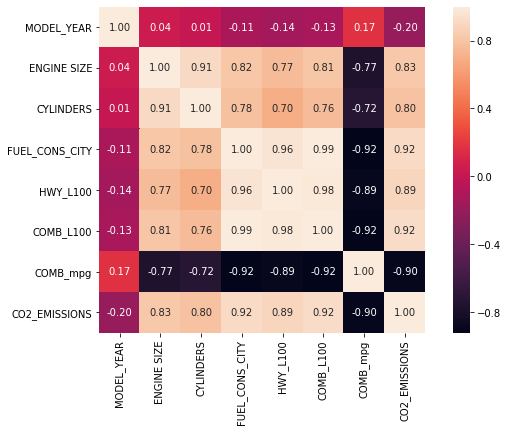

In [42]:
corrmat = df.corr()
plt.figure(figsize=(10,6))
# sns.heatmap(corrmat,vmax=1, square=True
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

We can see that Engine Size, Cylinders, Fuel Consumption in city, HWy_l100,comb_l100 , comb_mpg are closely correlated with CO2_Emission.

Further more in our case we can see that the Fuel consumption in city, HWYL100 and comb 100 have a strong correlation 
between themselves. This is called multi-colinearity. Moderate multicolinearity might now pose a problem, however, like in our case where a colinearlity of 0.99 is seen this might cause problems, such as 
- Estimates for regression cofficients to be unreliable
- Multicolinearity saps the statistical power of the analysis can cause the coefficients to switch signs, distorting the correct model.

We will look at Multicolinearity and how to measure the extent of it using a technique called Variance Inflation factor later. For now though let us drop the variable that might cause this issue.

We will therefore use Engine Size, cylinders and COMB_MPG(FUEL COnsumption l/100km) as our independent variables

In [31]:
# Define the feature matrix 
X = df[['ENGINE SIZE','CYLINDERS','COMB_mpg']]
ones = np.ones(len(X), dtype = 'int8')
X.insert(0,'Ones',ones)

In [32]:
# Define the target Matrix 
y = df.CO2_EMISSIONS

In [33]:
y.head()

0    186
1    175
2    230
3    264
4    198
Name: CO2_EMISSIONS, dtype: int64

In [34]:
# Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, shuffle = True)

In [35]:
# Display the shape of the training and test data set
print('X train shape is', X_train.shape)
print('X test shape is', X_test.shape)
print('Y train shape is', y_train.shape)
print('y test shape is', y_test.shape)

X train shape is (10757, 4)
X test shape is (3586, 4)
Y train shape is (10757,)
y test shape is (3586,)


We will be using the least squares estimates(LSE) to find the intercepts. The LSE works very well for computing 
the coeffients of linear regression, whether simple or multiple linear regression.

The only drawback to the LSE is if the independent variable are linearly-dependent. 

The LSE formula
b = (inverse of (Matrix of X-transposed pre-multiplied by matrix X))pre-multiplied by matrix of X-transposed premultipled by matrix of y

In [36]:
# Conver the X_train and X_test to numpy array for ease of computing
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
# Next we can transpose the X_train
X_trans = X_train.transpose()
print("The shape when x_train is transpose",X_trans.shape)

The shape when x_train is transpose (4, 10757)


In [38]:
# X-transposed post-multiplied by X  using numpy's matrix multiply function (X)
X_trans_X = np.matmul(X_trans, X_train)
print('X_trans_X shape is ',X_trans_X.shape)

X_trans_X shape is  (4, 4)


In [39]:
# Next let's find out the inverse of X_transposed postmultiplied by X transposed
# import inverse function from numpy
from numpy.linalg import inv

X_trans_X_inv = inv(X_trans_X)
print("The shape of X_trans_X_inv is ", X_trans_X_inv.shape)

The shape of X_trans_X_inv is  (4, 4)


In [40]:
# Next we multiply X-transposed  to inverse of X-transposed
X_trans_X_inv_X_trans = np.matmul(X_trans_X_inv,X_trans)
print("THe shape of X_trans_X_inv_X_trans is: " , X_trans_X_inv_X_trans.shape)

THe shape of X_trans_X_inv_X_trans is:  (4, 10757)


In [41]:
# Finally we post multiple the (X_transposed * X-invesed)* X_transposed *  y
b = np.matmul(X_trans_X_inv_X_trans, y_train)
print('The shape of b or coffiencents is :' , b.shape)

The shape of b or coffiencents is : (4,)


In [42]:
print(b)
intercept_x, engine_m, cylinder_m, comb_m = b

[327.42958012   7.67589107   5.75513215  -5.11984285]


In [43]:
print(round(comb_m,2))

-5.12


Therefore we have our intercept(b) 321.0699, and slope for Engine_sie = 8.50, 
slope of cylinders = 5.56, and slope of COMB_MPG = -4.94

Our equation is therefore

y_hat = 312.0699 + 8.50x1+ 5.56x2+ (-4.94x3)

In [44]:
# Predicting a car with 3.2l engine size, 6 cylinder and comb_mpg value of 28

co2_pred_1 = intercept_x + engine_m * 3.21 + cylinder_m * 6 + comb_m * 28

In [45]:
print(f"The total co2 produced by such a car would be {co2_pred_1}")

The total co2 produced by such a car would be 243.24438341028556


In [46]:
# Function for prediction

def co2_predict(x):
    x = list(x)
    x = x[0]* intercept_x + x[1]* engine_m+ x[2]*cylinder_m+ x[3]*comb_m
    return x

In [47]:
X_eval = pd.DataFrame(X_test)

In [48]:
X_eval.head()

,0,1,2,3
0,1.0,6.8,10.0,15.0
1,1.0,2.0,4.0,32.0
2,1.0,2.5,4.0,32.0
3,1.0,4.2,8.0,24.0
4,1.0,2.5,4.0,32.0


In [49]:
y_hat = np.ceil(X_eval.apply(co2_predict, axis = 1))

In [51]:
y_hat

0       361.0
1       202.0
2       206.0
3       283.0
4       206.0
5       315.0
6       323.0
7       281.0
8        49.0
9       282.0
10      228.0
11      239.0
12      253.0
13      205.0
14      278.0
15      222.0
16      283.0
17      287.0
18      243.0
19      223.0
20      258.0
21      343.0
22      202.0
23      148.0
24      343.0
25      275.0
26      247.0
27      257.0
28      267.0
29      224.0
        ...  
3556    237.0
3557    313.0
3558    237.0
3559    142.0
3560    199.0
3561    251.0
3562    281.0
3563    310.0
3564    218.0
3565    125.0
3566    298.0
3567    211.0
3568    300.0
3569    171.0
3570    243.0
3571    196.0
3572    297.0
3573    245.0
3574    303.0
3575    206.0
3576    324.0
3577    275.0
3578    285.0
3579    268.0
3580    247.0
3581    110.0
3582    257.0
3583    324.0
3584    222.0
3585    259.0
Length: 3586, dtype: float64

In [61]:
predicted_co2_test_data = pd.concat([pd.DataFrame(y_test), y_hat], axis = 1)

In [62]:
# How apply function is actually working 
predicted_values = []
for index, row in X_eval.iterrows():
    predicted_values.append(np.ceil(row[0]* intercept_x +  row[1]* engine_m + row[2] * cylinder_m + row[3] * comb_m))

Evaluating the Algereric model accuracy:


In [63]:
MSE = mean_squared_error(y_test,y_hat)
RMSE = MSE ** 0.5
print(MSE,RMSE)


499.5674846625767 22.35100634563412


Questions:

- What is Mean Square error (MSE)? What does it say ?
- What is Root mean squared error(RMSE)? What does it say?

In [64]:
# Computing R-squared ( R-squared tells us how confident our model prediction is)

# First we find the range of the target variable , y 

y_range = y_test.max() - y_test.min()

# then we compute the RMSE as a percentage of the range of y
error_margin = (RMSE/y_range)*100

# Finding the R-squared score
r2_scores = r2_score(y_test,y_hat)

print("The error margin is", format(error_margin,'.2f'))
print("The r-square score,", format(r2_scores,'.2f'))

The error margin is 5.09
The r-square score, 0.86


We can therefore say that our model is 85% confident in each of the prediction and has an error margin of just within 
4.6% range of the target variable.

### Using the sklearn library 

Earlier we wrote our own matrix algebra model, now let us use the existing sklearn library for the same dataset and compare the two results

In [65]:
# instantiate a linear regressin model
model = LinearRegression()
#Next train the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# printing the slope and gradients
slope_1 = model.coef_
intercept_1 = model.intercept_
print(f"Slope{slope_1}, Intercept{intercept_1}")

Slope[ 0.          8.54918341  5.69928199 -4.97170381], Intercept320.8340606340241


In [67]:
# Predicting the tst data set using SKlearn model
y_pred = model.predict(X_test)

In [68]:
# Evaluate the performance of the model
model_mse = mean_squared_error(y_test,y_pred)
model_rmse = model_mse ** 0.5
model_error_margin = (model_rmse/y_range) * 100
model_r2_score = r2_score(y_test,y_pred)

print("The error margin is", format(model_error_margin,'.2f'))
print("The r-square score,", format(model_r2_score,'.2f'))

The error margin is 5.09
The r-square score, 0.86


In [69]:
# Compare the stats of the matrix algebra and sklearn models
summary_dict = {'algebra_mode':[intercept_x, engine_m,cylinder_m,comb_m, MSE,RMSE,error_margin, r2_scores],
               'sklearn_model':[intercept_1, slope_1[1], slope_1[2],slope_1[3],model_mse,
                                model_rmse, model_error_margin,model_r2_score]}
summary_df = pd.DataFrame(summary_dict)
summary_df

,algebra_mode,sklearn_model
0,320.834061,320.834061
1,8.549183,8.549183
2,5.699282,5.699282
3,-4.971704,-4.971704
4,499.567485,498.880782
5,22.351006,22.335639
6,5.091345,5.087845
7,0.855715,0.855913


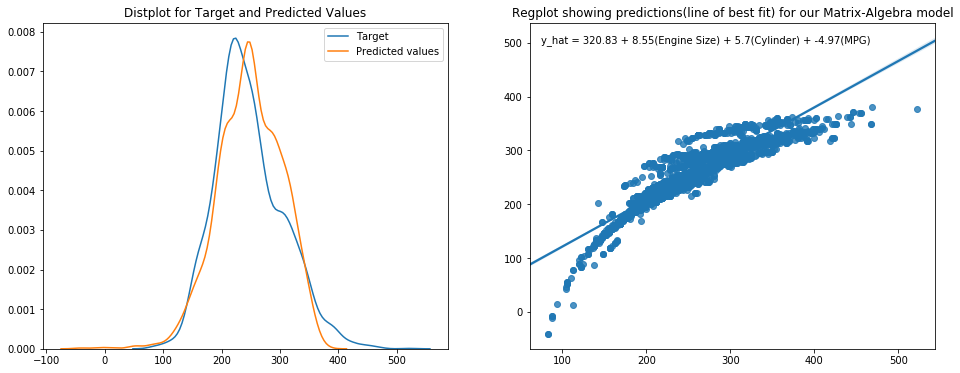

In [83]:
# Visualization:
# plt.figure(figsize=(10,6))

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
# fig.suptitle ('Plotting the ')

sns.distplot(y_test, hist = False, label = 'Target', ax = axs[0])
axs[0].set_title('Distplot for Target and Predicted Values')
sns.distplot(y_hat, hist = False, label = 'Predicted values', ax = axs[0])

sns.regplot(y_test,y_hat, ax = axs[1])
axs[1].set_title('Regplot showing predictions(line of best fit) for our Matrix-Algebra model')
plt.text(75, 500, f"y_hat = {round(intercept_x,2)} + {round(engine_m,2)}(Engine Size) + {round(cylinder_m,2)}(Cylinder) + {round(comb_m,2)}(MPG)")
plt.savefig('regression.png')

In [254]:
df.to_csv('Co2_data_canada.csv')

In [262]:
test_df = {'x': [1,2,3,4,5], 'y':[24,56,23,12,12],'z':[98,101,120,120,123]}

In [263]:
test_df = pd.DataFrame(test_df)

In [272]:
test_df

,x,y,z
0,1,24,98
1,2,56,101
2,3,23,120
3,4,12,120
4,5,12,123


In [268]:
def sum_this(x):
    x = list(x)
    x[0] = x[0] + 1
    x[1] = x[1] + 1
    x[2] = x[2] + 1
    return x[0],x[1],x[2]

In [271]:
test_df.apply(sum_this, axis = 1)

0     (2, 25, 99)
1    (3, 57, 102)
2    (4, 24, 121)
3    (5, 13, 121)
4    (6, 13, 124)
dtype: object

In [275]:
for i,j in test_df.iterrows():
    print(j[0]+1,j[1]+1,j[2]+1)

2 25 99
3 57 102
4 24 121
5 13 121
6 13 124
